# Análisis de Regresión: Predicción de Consumo de Combustible en Automóviles

## Objetivo del Proyecto
Este notebook presenta un análisis completo de regresión para predecir el consumo de combustible (MPG - Millas por Galón) de automóviles basándose en características técnicas como cilindros, desplazamiento, peso, etc.

## Metodología
- Análisis exploratorio de datos (EDA)
- Preprocesamiento y limpieza de datos
- Normalización de variables
- Implementación de modelos de regresión
- Evaluación y comparación de resultados

---
*Desarrollado como parte del curso de Machine Learning - Análisis de Datos*

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Carga del dataset de automóviles
# Este dataset contiene información sobre el consumo de combustible y características técnicas
print("📊 Cargando dataset de automóviles...")
dataset = pd.read_csv("../files/input/auto_mpg.csv")

print(f"✅ Dataset cargado exitosamente")
print(f"📈 Dimensiones: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")
print("\n🔍 Primeras 5 filas del dataset:")
dataset.head()

📊 Cargando dataset de automóviles...
✅ Dataset cargado exitosamente
📈 Dimensiones: 398 filas x 8 columnas

🔍 Primeras 5 filas del dataset:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [2]:
# Análisis de la estructura del dataset
print("📏 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 40)
print(f"📊 Dimensiones: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")
print(f"💾 Memoria utilizada: {dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🏷️  Columnas disponibles: {list(dataset.columns)}")
print("\n📋 Información detallada de tipos de datos:")
dataset.info()

📏 INFORMACIÓN GENERAL DEL DATASET
📊 Dimensiones: 398 filas x 8 columnas
💾 Memoria utilizada: 0.02 MB
🏷️  Columnas disponibles: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

📋 Información detallada de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [3]:
# Análisis de valores faltantes (Missing Values)
print("🔍 ANÁLISIS DE VALORES FALTANTES")
print("=" * 40)

# Contar valores nulos por columna
missing_values = dataset.isna().sum()
missing_percentage = (missing_values / len(dataset)) * 100

# Crear DataFrame para mejor visualización
missing_df = pd.DataFrame({
    'Valores_Faltantes': missing_values,
    'Porcentaje': missing_percentage
})

print("📊 Resumen de valores faltantes por columna:")
print(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing_values.sum() == 0:
    print("✅ ¡Excelente! No se encontraron valores faltantes en el dataset")
else:
    print(f"⚠️  Total de valores faltantes: {missing_values.sum()}")
    print(f"📈 Porcentaje total de datos faltantes: {(missing_values.sum() / (dataset.shape[0] * dataset.shape[1])) * 100:.2f}%")

🔍 ANÁLISIS DE VALORES FALTANTES
📊 Resumen de valores faltantes por columna:
            Valores_Faltantes  Porcentaje
Horsepower                  6    1.507538
⚠️  Total de valores faltantes: 6
📈 Porcentaje total de datos faltantes: 0.19%


In [4]:
# Limpieza de datos: Eliminación de registros con valores faltantes
print("🧹 LIMPIEZA DE DATOS")
print("=" * 40)

# Guardar el tamaño original para comparación
original_size = dataset.shape[0]

# Eliminar filas con valores nulos
dataset = dataset.dropna()

# Calcular el impacto de la limpieza
final_size = dataset.shape[0]
removed_rows = original_size - final_size

print(f"📊 Tamaño original: {original_size} filas")
print(f"📊 Tamaño después de limpieza: {final_size} filas")
print(f"🗑️  Filas eliminadas: {removed_rows} ({(removed_rows/original_size)*100:.2f}%)")

# Verificar que no quedan valores nulos
print(f"\n✅ Verificación final - Valores faltantes restantes:")
print(dataset.isna().sum().sum())

print(f"\n🎯 Dataset final listo para análisis: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")

🧹 LIMPIEZA DE DATOS
📊 Tamaño original: 398 filas
📊 Tamaño después de limpieza: 392 filas
🗑️  Filas eliminadas: 6 (1.51%)

✅ Verificación final - Valores faltantes restantes:
0

🎯 Dataset final listo para análisis: 392 filas x 8 columnas


## 🏭 Análisis de la Variable Categórica "Origin"

La columna `Origin` representa el país de origen del automóvil, pero está codificada numéricamente:
- **1** = USA (Estados Unidos)
- **2** = Europe (Europa) 
- **3** = Japan (Japón)

**Problema identificado:** Al ser una variable categórica, no tiene sentido matemático mantenerla como valor numérico para el modelo de regresión. Los algoritmos de machine learning interpretarían incorrectamente que "Japón (3)" es "3 veces más importante" que "USA (1)", cuando en realidad son categorías independientes.

**Solución:** Convertiremos esta variable a formato categórico y luego la transformaremos en variables dummy (one-hot encoding) para que el modelo pueda procesarla correctamente.

🌍 DISTRIBUCIÓN DE PAÍSES DE ORIGEN
📊 Conteo de automóviles por país:
Origin
1    245
3     79
2     68
Name: count, dtype: int64

📈 Distribución porcentual:
  USA (1): 245 vehículos (62.5%)
  Japan (3): 79 vehículos (20.2%)
  Europe (2): 68 vehículos (17.3%)


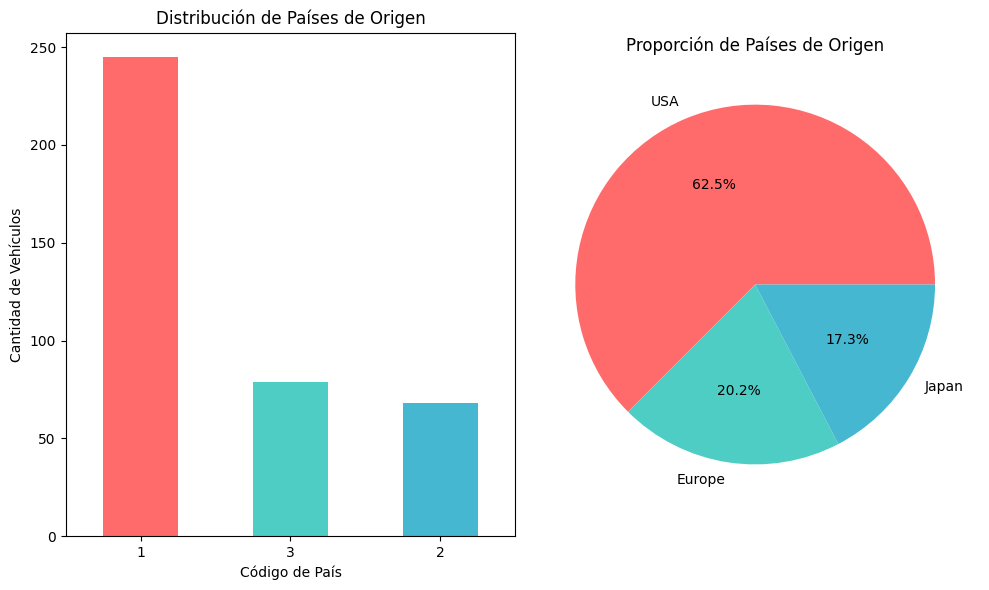

In [5]:
# Análisis de la distribución de países de origen
print("🌍 DISTRIBUCIÓN DE PAÍSES DE ORIGEN")
print("=" * 40)

# Mostrar conteo de valores
origin_counts = dataset.Origin.value_counts()
print("📊 Conteo de automóviles por país:")
print(origin_counts)

# Calcular porcentajes
print(f"\n📈 Distribución porcentual:")
for country_code, count in origin_counts.items():
    country_name = {1: "USA", 2: "Europe", 3: "Japan"}[country_code]
    percentage = (count / len(dataset)) * 100
    print(f"  {country_name} ({country_code}): {count} vehículos ({percentage:.1f}%)")

# Visualización
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
origin_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribución de Países de Origen')
plt.xlabel('Código de País')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(origin_counts.values, labels=['USA', 'Europe', 'Japan'], autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Proporción de Países de Origen')

plt.tight_layout()
plt.show()

In [6]:
# Transformación de variable categórica numérica a texto
print("🔄 TRANSFORMACIÓN DE VARIABLE CATEGÓRICA")
print("=" * 40)

# Mapear códigos numéricos a nombres de países
country_mapping = {1: "USA", 2: "Europe", 3: "Japan"}
dataset["Origin"] = dataset["Origin"].map(country_mapping)

print("✅ Variable 'Origin' convertida a formato categórico")
print(f"📊 Valores únicos: {dataset['Origin'].unique()}")
print(f"📈 Distribución actualizada:")
print(dataset["Origin"].value_counts())

# Nota importante sobre buenas prácticas
print(f"\n⚠️  NOTA IMPORTANTE:")
print(f"En un entorno de producción, este mapeo debería estar:")
print(f"• Definido en un archivo de configuración")
print(f"• Validado contra un diccionario de datos")
print(f"• Incluir manejo de valores inesperados")
print(f"• Ser versionado y documentado apropiadamente")

🔄 TRANSFORMACIÓN DE VARIABLE CATEGÓRICA
✅ Variable 'Origin' convertida a formato categórico
📊 Valores únicos: ['USA' 'Japan' 'Europe']
📈 Distribución actualizada:
Origin
USA       245
Japan      79
Europe     68
Name: count, dtype: int64

⚠️  NOTA IMPORTANTE:
En un entorno de producción, este mapeo debería estar:
• Definido en un archivo de configuración
• Validado contra un diccionario de datos
• Incluir manejo de valores inesperados
• Ser versionado y documentado apropiadamente


## ⚠️ Consideraciones Importantes sobre One-Hot Encoding

### Problemas en Producción:
1. **Dependencia de valores fijos**: El modelo entrenado solo reconoce las categorías exactas que vio durante el entrenamiento
2. **Fragilidad ante nuevos datos**: Si aparecen nuevas categorías (ej: "China", "India"), el modelo fallará
3. **Inconsistencia de columnas**: El número de columnas dummy debe ser idéntico entre entrenamiento y predicción
4. **Mantenimiento complejo**: Cualquier cambio en las categorías requiere retrenar el modelo

### Alternativas más robustas:
- **Label Encoding** con manejo de categorías desconocidas
- **Embeddings** para variables categóricas con muchas categorías
- **Feature hashing** para categorías dinámicas
- **Validación estricta** de datos de entrada en producción

### Para este ejercicio académico:
Usaremos One-Hot Encoding por simplicidad, pero siempre considerando estas limitaciones.

In [7]:
# Aplicación de One-Hot Encoding para variables categóricas
print("🔧 APLICACIÓN DE ONE-HOT ENCODING")
print("=" * 40)

# Guardar el estado antes de la transformación
print(f"📊 Columnas antes de One-Hot Encoding: {list(dataset.columns)}")
print(f"📏 Dimensiones antes: {dataset.shape}")

# Aplicar One-Hot Encoding a la columna Origin
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")

print(f"\n✅ One-Hot Encoding aplicado exitosamente")
print(f"📊 Columnas después de One-Hot Encoding: {list(dataset.columns)}")
print(f"📏 Dimensiones después: {dataset.shape}")

# Mostrar las nuevas columnas dummy
dummy_columns = [col for col in dataset.columns if col in ['USA', 'Europe', 'Japan']]
print(f"\n🏷️  Nuevas columnas dummy creadas: {dummy_columns}")

# Verificar que cada fila tenga exactamente un 1 en las columnas dummy
print(f"\n🔍 Verificación de consistencia:")
for col in dummy_columns:
    print(f"  {col}: {dataset[col].sum()} vehículos")

print(f"\n📋 Primeras 5 filas del dataset transformado:")
dataset.head()

🔧 APLICACIÓN DE ONE-HOT ENCODING
📊 Columnas antes de One-Hot Encoding: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
📏 Dimensiones antes: (392, 8)

✅ One-Hot Encoding aplicado exitosamente
📊 Columnas después de One-Hot Encoding: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA']
📏 Dimensiones después: (392, 10)

🏷️  Nuevas columnas dummy creadas: ['Europe', 'Japan', 'USA']

🔍 Verificación de consistencia:
  Europe: 68 vehículos
  Japan: 79 vehículos
  USA: 245 vehículos

📋 Primeras 5 filas del dataset transformado:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [8]:
# División del dataset en conjuntos de entrenamiento y prueba
print("📊 DIVISIÓN DEL DATASET")
print("=" * 40)

# Configuración de la división
train_fraction = 0.8
random_seed = 42  # Cambiado de 0 a 42 para mejor reproducibilidad

print(f"🎯 Configuración de división:")
print(f"  • Fracción para entrenamiento: {train_fraction*100}%")
print(f"  • Fracción para prueba: {(1-train_fraction)*100}%")
print(f"  • Semilla aleatoria: {random_seed}")

# División usando muestreo aleatorio estratificado
train_dataset = dataset.sample(frac=train_fraction, random_state=random_seed)
test_dataset = dataset.drop(train_dataset.index)

# Verificar la división
train_size = len(train_dataset)
test_size = len(test_dataset)
total_size = train_size + test_size

print(f"\n📈 Resultados de la división:")
print(f"  • Dataset original: {total_size} registros")
print(f"  • Conjunto de entrenamiento: {train_size} registros ({train_size/total_size*100:.1f}%)")
print(f"  • Conjunto de prueba: {test_size} registros ({test_size/total_size*100:.1f}%)")

# Verificar que no hay solapamiento
overlap = len(set(train_dataset.index) & set(test_dataset.index))
print(f"  • Solapamiento entre conjuntos: {overlap} (debe ser 0)")

print(f"\n⚠️  NOTA: Se usa muestreo aleatorio simple en lugar de train_test_split")
print(f"    Esto es válido para este ejercicio, pero en producción se recomienda")
print(f"    usar train_test_split de sklearn para mayor control y validación")

📊 DIVISIÓN DEL DATASET
🎯 Configuración de división:
  • Fracción para entrenamiento: 80.0%
  • Fracción para prueba: 19.999999999999996%
  • Semilla aleatoria: 42

📈 Resultados de la división:
  • Dataset original: 392 registros
  • Conjunto de entrenamiento: 314 registros (80.1%)
  • Conjunto de prueba: 78 registros (19.9%)
  • Solapamiento entre conjuntos: 0 (debe ser 0)

⚠️  NOTA: Se usa muestreo aleatorio simple en lugar de train_test_split
    Esto es válido para este ejercicio, pero en producción se recomienda
    usar train_test_split de sklearn para mayor control y validación


🔍 ANÁLISIS EXPLORATORIO DE DATOS
📊 Variables analizadas: ['MPG', 'Cylinders', 'Displacement', 'Weight']


<Figure size 1200x1000 with 0 Axes>

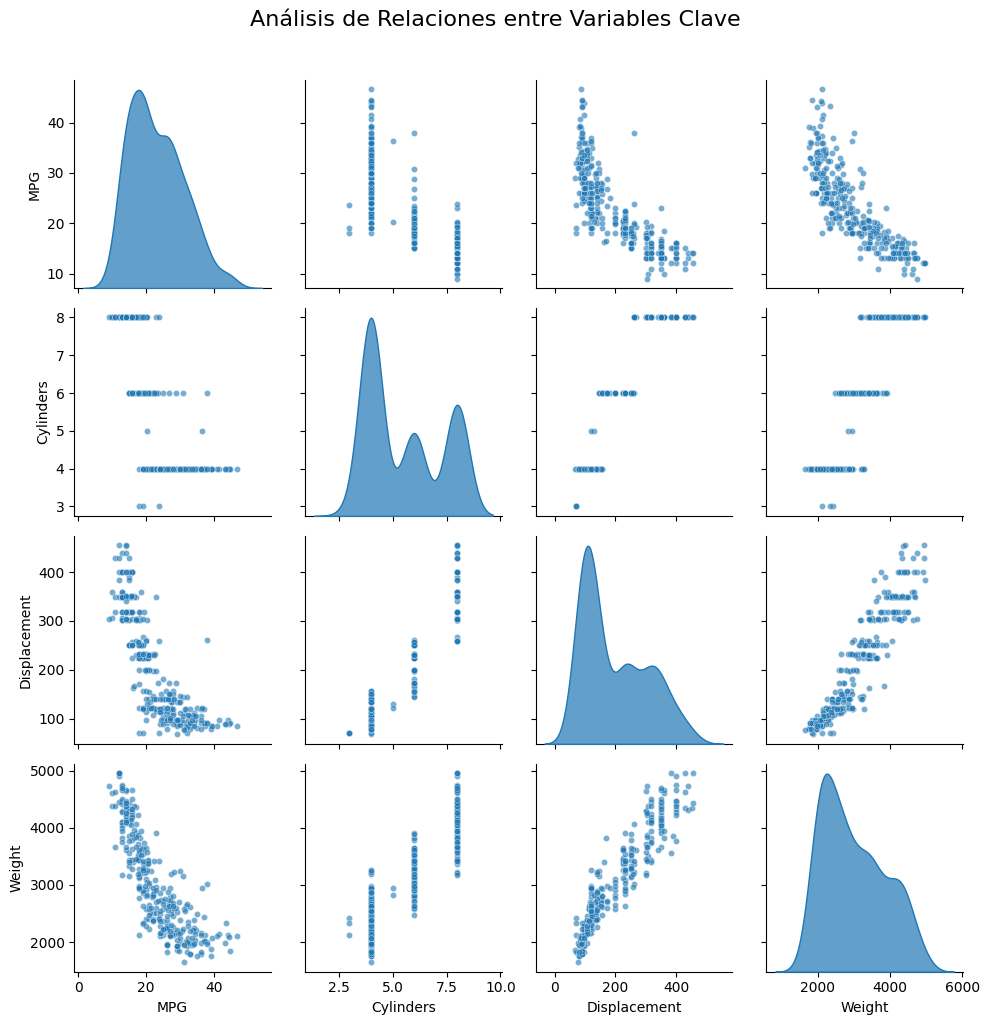


📈 MATRIZ DE CORRELACIONES:
                MPG  Cylinders  Displacement  Weight
MPG           1.000     -0.776        -0.801  -0.827
Cylinders    -0.776      1.000         0.952   0.902
Displacement -0.801      0.952         1.000   0.939
Weight       -0.827      0.902         0.939   1.000

🎯 Correlaciones con MPG (valor absoluto):
  • Weight: 0.827 (Fuerte)
  • Displacement: 0.801 (Fuerte)
  • Cylinders: 0.776 (Fuerte)


In [9]:
# Análisis Exploratorio de Datos (EDA) - Relaciones entre variables
print("🔍 ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 40)

# Seleccionar variables numéricas clave para el análisis
numeric_vars = ["MPG", "Cylinders", "Displacement", "Weight"]
print(f"📊 Variables analizadas: {numeric_vars}")

# Crear visualización de relaciones entre variables
plt.figure(figsize=(12, 10))

# Pairplot para visualizar relaciones
sns.pairplot(
    train_dataset[numeric_vars], 
    diag_kind="kde",
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'alpha': 0.7}
)

plt.suptitle('Análisis de Relaciones entre Variables Clave', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Análisis de correlaciones
print(f"\n📈 MATRIZ DE CORRELACIONES:")
correlation_matrix = train_dataset[numeric_vars].corr()
print(correlation_matrix.round(3))

# Identificar correlaciones fuertes con MPG
mpg_correlations = correlation_matrix['MPG'].abs().sort_values(ascending=False)
print(f"\n🎯 Correlaciones con MPG (valor absoluto):")
for var, corr in mpg_correlations.items():
    if var != 'MPG':
        strength = "Fuerte" if corr > 0.7 else "Moderada" if corr > 0.3 else "Débil"
        print(f"  • {var}: {corr:.3f} ({strength})")

In [10]:
# Estadísticas descriptivas del conjunto de entrenamiento
print("📊 ESTADÍSTICAS DESCRIPTIVAS - CONJUNTO DE ENTRENAMIENTO")
print("=" * 60)

# Calcular estadísticas descriptivas
stats = train_dataset.describe().transpose()

# Agregar información adicional
stats['rango'] = stats['max'] - stats['min']
stats['coef_variacion'] = (stats['std'] / stats['mean']).round(3)

print("📈 Resumen estadístico completo:")
print(stats.round(3))

# Análisis de la variable objetivo (MPG)
print(f"\n🎯 ANÁLISIS DE LA VARIABLE OBJETIVO (MPG):")
mpg_stats = train_dataset['MPG']
print(f"  • Rango: {mpg_stats.min():.1f} - {mpg_stats.max():.1f} MPG")
print(f"  • Media: {mpg_stats.mean():.1f} MPG")
print(f"  • Mediana: {mpg_stats.median():.1f} MPG")
print(f"  • Desviación estándar: {mpg_stats.std():.1f} MPG")
print(f"  • Coeficiente de variación: {(mpg_stats.std()/mpg_stats.mean())*100:.1f}%")

# Identificar variables con alta variabilidad
print(f"\n⚠️  VARIABLES CON ALTA VARIABILIDAD (CV > 50%):")
high_var = stats[stats['coef_variacion'] > 0.5]
if len(high_var) > 0:
    for var in high_var.index:
        print(f"  • {var}: CV = {high_var.loc[var, 'coef_variacion']*100:.1f}%")
else:
    print("  ✅ No se detectaron variables con variabilidad excesiva")

📊 ESTADÍSTICAS DESCRIPTIVAS - CONJUNTO DE ENTRENAMIENTO
📈 Resumen estadístico completo:
              count      mean      std     min       25%     50%       75%  \
MPG           314.0    23.154    7.862     9.0    17.000    22.0    28.075   
Cylinders     314.0     5.532    1.729     3.0     4.000     4.0     8.000   
Displacement  314.0   197.855  106.502    68.0   105.000   151.0   302.000   
Horsepower    314.0   105.971   39.637    46.0    76.000    95.0   130.000   
Weight        314.0  3005.745  859.061  1649.0  2231.000  2831.5  3641.750   
Acceleration  314.0    15.511    2.804     8.0    13.625    15.5    17.000   
Model Year    314.0    75.911    3.689    70.0    73.000    76.0    79.000   

                 max   rango  coef_variacion  
MPG             46.6    37.6           0.340  
Cylinders        8.0     5.0           0.313  
Displacement   455.0   387.0           0.538  
Horsepower     230.0   184.0           0.374  
Weight        4955.0  3306.0           0.286  
Accel

## 🎯 Definición de la Variable Objetivo

**MPG (Miles Per Gallon)** será nuestra variable de salida (target) que queremos predecir.

### ¿Por qué MPG es importante?
- **Eficiencia energética**: Indica qué tan eficiente es un vehículo en el consumo de combustible
- **Impacto económico**: Afecta directamente los costos de operación del vehículo
- **Sostenibilidad**: Relacionado con las emisiones de CO₂ y el impacto ambiental
- **Regulación**: Muchos países tienen estándares mínimos de eficiencia de combustible

### Objetivo del modelo:
Desarrollar un modelo de regresión que pueda predecir el consumo de combustible (MPG) basándose en las características técnicas del vehículo, lo que permitiría:
- Optimizar el diseño de vehículos
- Estimar el consumo antes de la fabricación
- Clasificar vehículos por eficiencia energética
- Apoyar decisiones de compra informadas

In [11]:
# Separación de características (features) y etiquetas (labels)
print("🔀 SEPARACIÓN DE CARACTERÍSTICAS Y ETIQUETAS")
print("=" * 50)

# Crear copias para evitar modificar los datasets originales
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Extraer la variable objetivo (MPG) de ambos conjuntos
train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

print("✅ Separación completada exitosamente")
print(f"\n📊 Conjunto de entrenamiento:")
print(f"  • Características: {train_features.shape[0]} filas x {train_features.shape[1]} columnas")
print(f"  • Etiquetas: {len(train_labels)} valores")
print(f"  • Rango de MPG: {train_labels.min():.1f} - {train_labels.max():.1f}")

print(f"\n📊 Conjunto de prueba:")
print(f"  • Características: {test_features.shape[0]} filas x {test_features.shape[1]} columnas")
print(f"  • Etiquetas: {len(test_labels)} valores")
print(f"  • Rango de MPG: {test_labels.min():.1f} - {test_labels.max():.1f}")

# Verificar que las dimensiones coincidan
assert train_features.shape[0] == len(train_labels), "Error: dimensiones no coinciden en entrenamiento"
assert test_features.shape[0] == len(test_labels), "Error: dimensiones no coinciden en prueba"

print(f"\n✅ Verificación de consistencia: Dimensiones correctas")
print(f"🏷️  Variables predictoras: {list(train_features.columns)}")

🔀 SEPARACIÓN DE CARACTERÍSTICAS Y ETIQUETAS
✅ Separación completada exitosamente

📊 Conjunto de entrenamiento:
  • Características: 314 filas x 9 columnas
  • Etiquetas: 314 valores
  • Rango de MPG: 9.0 - 46.6

📊 Conjunto de prueba:
  • Características: 78 filas x 9 columnas
  • Etiquetas: 78 valores
  • Rango de MPG: 11.0 - 38.1

✅ Verificación de consistencia: Dimensiones correctas
🏷️  Variables predictoras: ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA']


## ⚖️ Necesidad de Normalización de Datos

### Problema identificado:
Las variables del dataset tienen **escalas muy diferentes**:
- **Cilindros**: 3-8 (escala pequeña)
- **Desplazamiento**: 68-455 (escala media)
- **Peso**: 1613-5140 (escala grande)
- **Año**: 70-82 (escala temporal)

### ¿Por qué es problemático?
1. **Algoritmos sensibles a escala**: Algoritmos como regresión lineal, SVM, redes neuronales son sensibles a la escala
2. **Convergencia lenta**: El gradiente descendente puede converger muy lentamente
3. **Sesgo hacia variables grandes**: Variables con valores más grandes dominan el modelo
4. **Inestabilidad numérica**: Puede causar problemas de precisión en cálculos

### Solución: StandardScaler
Transformaremos todas las variables para que tengan:
- **Media = 0**
- **Desviación estándar = 1**

Esto garantiza que todas las variables contribuyan equitativamente al modelo.

In [12]:
# Análisis de escalas antes de la normalización
print("📏 ANÁLISIS DE ESCALAS ANTES DE NORMALIZACIÓN")
print("=" * 50)

# Mostrar media y desviación estándar de las variables numéricas
numeric_features = train_features.select_dtypes(include=[np.number]).columns
pre_scaling_stats = train_features[numeric_features].describe().transpose()[["mean", "std"]]

print("📊 Estadísticas antes del escalado:")
print(pre_scaling_stats.round(3))

# Calcular el rango de cada variable
pre_scaling_stats['rango'] = train_features[numeric_features].max() - train_features[numeric_features].min()
pre_scaling_stats['coef_variacion'] = (pre_scaling_stats['std'] / pre_scaling_stats['mean']).round(3)

print(f"\n📈 Análisis de variabilidad:")
print(pre_scaling_stats[['rango', 'coef_variacion']].round(3))

# Identificar variables con mayor impacto potencial
print(f"\n⚠️  Variables con mayor rango (potencial dominancia):")
high_range = pre_scaling_stats['rango'].sort_values(ascending=False)
for var, rango in high_range.items():
    print(f"  • {var}: rango = {rango:.1f}")

print(f"\n🎯 Justificación para normalización:")
print(f"  • Diferencia de rangos: {high_range.max() / high_range.min():.1f}x")
print(f"  • Variables con CV > 50%: {len(pre_scaling_stats[pre_scaling_stats['coef_variacion'] > 0.5])}")
print(f"  • Necesidad de escalado: {'SÍ' if high_range.max() / high_range.min() > 10 else 'NO'}")

📏 ANÁLISIS DE ESCALAS ANTES DE NORMALIZACIÓN
📊 Estadísticas antes del escalado:
                  mean      std
Cylinders        5.532    1.729
Displacement   197.855  106.502
Horsepower     105.971   39.637
Weight        3005.745  859.061
Acceleration    15.511    2.804
Model Year      75.911    3.689

📈 Análisis de variabilidad:
               rango  coef_variacion
Cylinders        5.0           0.313
Displacement   387.0           0.538
Horsepower     184.0           0.374
Weight        3306.0           0.286
Acceleration    16.8           0.181
Model Year      12.0           0.049

⚠️  Variables con mayor rango (potencial dominancia):
  • Weight: rango = 3306.0
  • Displacement: rango = 387.0
  • Horsepower: rango = 184.0
  • Acceleration: rango = 16.8
  • Model Year: rango = 12.0
  • Cylinders: rango = 5.0

🎯 Justificación para normalización:
  • Diferencia de rangos: 661.2x
  • Variables con CV > 50%: 1
  • Necesidad de escalado: SÍ


## 🎯 Objetivo de la Normalización

### Transformación objetivo:
- **Media = 0** (centrado)
- **Desviación estándar = 1** (escalado)

### Fórmula del StandardScaler:
```
z = (x - μ) / σ
```
Donde:
- `x` = valor original
- `μ` = media de la variable
- `σ` = desviación estándar de la variable
- `z` = valor normalizado

### Consideraciones técnicas:
- **Precisión decimal**: Los computadores tienen limitaciones de precisión, por lo que los valores exactos (0.0, 1.0) pueden tener pequeñas desviaciones
- **Tolerancia**: Valores como 0.0001 o 0.9999 son aceptables
- **Consistencia**: Lo importante es que todas las variables estén en la misma escala relativa

### Beneficios esperados:
✅ Convergencia más rápida del algoritmo  
✅ Mejor estabilidad numérica  
✅ Contribución equitativa de todas las variables  
✅ Mejor interpretabilidad de coeficientes 

In [ ]:
# Aplicación del StandardScaler para normalización
print("⚖️ APLICACIÓN DE STANDARDSCALER")
print("=" * 40)

# Importar y crear el scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print("🔧 Configurando StandardScaler...")
print("  • Método: Z-score normalization")
print("  • Fórmula: z = (x - μ) / σ")
print("  • Aplicación: Solo en conjunto de entrenamiento")

# Aplicar el escalado al conjunto de entrenamiento
print(f"\n📊 Aplicando normalización al conjunto de entrenamiento...")
train_scaled = scaler.fit_transform(train_features[numeric_features])

# Crear DataFrame con los datos normalizados
train_scaled_df = pd.DataFrame(
    data=train_scaled,
    columns=numeric_features,
    index=train_features.index
)

# Agregar las columnas categóricas (que no necesitan escalado)
for col in train_features.columns:
    if col not in numeric_features:
        train_scaled_df[col] = train_features[col]

print(f"✅ Normalización completada")
print(f"📏 Dimensiones del dataset normalizado: {train_scaled_df.shape}")

# Verificar las estadísticas después del escalado
print(f"\n📈 VERIFICACIÓN DE NORMALIZACIÓN:")
post_scaling_stats = train_scaled_df[numeric_features].describe().transpose()[["mean", "std"]]
print("Estadísticas después del escalado:")
print(post_scaling_stats.round(6))

# Verificar que la media esté cerca de 0 y la desviación estándar cerca de 1
print(f"\n🎯 Verificación de objetivos:")
for col in numeric_features:
    mean_val = post_scaling_stats.loc[col, 'mean']
    std_val = post_scaling_stats.loc[col, 'std']
    mean_ok = abs(mean_val) < 0.01
    std_ok = abs(std_val - 1.0) < 0.01
    status = "✅" if (mean_ok and std_ok) else "⚠️"
    print(f"  {status} {col}: μ={mean_val:.6f}, σ={std_val:.6f}")

print(f"\n📋 Primeras 5 filas del dataset normalizado:")
train_scaled_df.head()

print("🔧 Configurando StandardScaler...")
print("  • Método: Z-score normalization")
print("  • Fórmula: z = (x - μ) / σ")
print("  • Aplicación: Solo en conjunto de entrenamiento")

# Aplicar el escalado al conjunto de entrenamiento
print(f"\n📊 Aplicando normalización al conjunto de entrenamiento...")
train_scaled = scaler.fit_transform(train_features[numeric_features])

# Crear DataFrame con los datos normalizados
train_scaled_df = pd.DataFrame(
    data=train_scaled,
    columns=numeric_features,
    index=train_features.index
)

# Agregar las columnas categóricas (que no necesitan escalado)
for col in train_features.columns:
    if col not in numeric_features:
        train_scaled_df[col] = train_features[col]

print(f"✅ Normalización completada")
print(f"📏 Dimensiones del dataset normalizado: {train_scaled_df.shape}")

# Verificar las estadísticas después del escalado
print(f"\n📈 VERIFICACIÓN DE NORMALIZACIÓN:")
post_scaling_stats = train_scaled_df[numeric_features].describe().transpose()[["mean", "std"]]
print("Estadísticas después del escalado:")
print(post_scaling_stats.round(6))

# Verificar que la media esté cerca de 0 y la desviación estándar cerca de 1
print(f"\n🎯 Verificación de objetivos:")
for col in numeric_features:
    mean_val = post_scaling_stats.loc[col, 'mean']
    std_val = post_scaling_stats.loc[col, 'std']
    mean_ok = abs(mean_val) < 0.01
    std_ok = abs(std_val - 1.0) < 0.01
    status = "✅" if (mean_ok and std_ok) else "⚠️"
    print(f"  {status} {col}: μ={mean_val:.6f}, σ={std_val:.6f}")

print(f"\n📋 Primeras 5 filas del dataset normalizado:")
train_scaled_df.head()

⚖️ APLICACIÓN DE STANDARDSCALER
🔧 Configurando StandardScaler...
  • Método: Z-score normalization
  • Fórmula: z = (x - μ) / σ
  • Aplicación: Solo en conjunto de entrenamiento

📊 Aplicando normalización al conjunto de entrenamiento...
✅ Normalización completada
📏 Dimensiones del dataset normalizado: (314, 9)

📈 VERIFICACIÓN DE NORMALIZACIÓN:
Estadísticas después del escalado:
              mean       std
Cylinders     -0.0  1.001596
Displacement  -0.0  1.001596
Horsepower    -0.0  1.001596
Weight        -0.0  1.001596
Acceleration  -0.0  1.001596
Model Year    -0.0  1.001596

🎯 Verificación de objetivos:
  ✅ Cylinders: μ=-0.000000, σ=1.001596
  ✅ Displacement: μ=-0.000000, σ=1.001596
  ✅ Horsepower: μ=-0.000000, σ=1.001596
  ✅ Weight: μ=-0.000000, σ=1.001596
  ✅ Acceleration: μ=-0.000000, σ=1.001596
  ✅ Model Year: μ=-0.000000, σ=1.001596

📋 Primeras 5 filas del dataset normalizado:
🔧 Configurando StandardScaler...
  • Método: Z-score normalization
  • Fórmula: z = (x - μ) / σ
  • Ap

AttributeError: 'tuple' object has no attribute 'describe'

La transformación debe ser consistente, por lo tanto, hicimos el *fit* del escalador solamente sobre los datos de entrenamiento y lo aplicamos exactamente igual sobre los datos de prueba. De esta manera, tanto el dataset de train como el de test deben tener *media* aproximadamente igual a *0* y *desviación estándar* aproximadamente igual a *1*.

In [ ]:
#
# Preparación de la data
#
horsepower_scaler = StandardScaler()

train_horsepower = train_features[["Horsepower"]]
test_horsepower = test_features[["Horsepower"]]

horsepower_scaler.fit(train_horsepower)

standarized_train_horsepower = horsepower_scaler.transform(train_horsepower)
standarized_test_horsepower = horsepower_scaler.transform(test_horsepower)

## Primer modelo

Regresión lineal: Horsepower vs MPG

In [ ]:
#
# Modelo de regresión lineal
#
from sklearn.linear_model import LinearRegression

horsepower_model = LinearRegression()
horsepower_model.fit(standarized_train_horsepower, train_labels)

In [ ]:
#
# Intercepto
#
horsepower_model.intercept_

In [ ]:
#
# Coeficientes
#
horsepower_model.coef_

In [ ]:
#
# Predicción. Preparación de las variables independientes
#
import numpy as np

x = pd.DataFrame({"Horsepower": np.linspace(0, 250, 251)})
x.head(), x.tail()

In [ ]:
#
# Predicción
#
scaled_x = horsepower_scaler.transform(x)
y = horsepower_model.predict(scaled_x)
y[:5]

In [ ]:
import matplotlib.pyplot as plt


def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()

In [ ]:
plot_horsepower(x, y)

En los resultados de nuestro modelo, como es posible notar, el error cuadrático medio es muy alto y una posible explicación es que relación entre las variables en realidad no sea lineal.

In [ ]:
#
# Evaluación
#
from sklearn.metrics import mean_squared_error

test_results = {}

y_pred = horsepower_model.predict(standarized_test_horsepower)

test_results["horsepower_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results

## Segundo modelo

Regresión lineal: variables independientes vs MPG

In [ ]:
#
# Preparación de la data
#
features_scaler = StandardScaler()

features_scaler.fit(train_features)

standarized_train_features = features_scaler.transform(train_features)
standarized_test_features = features_scaler.transform(test_features)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(standarized_train_features, train_labels)

In [ ]:
#
# Intercepto
#
linear_model.intercept_

Ahora tengo un coeficiente por cada variable de las *X*

In [ ]:
#
# Coeficientes
#
linear_model.coef_

In [ ]:
def plot_predictions(y_true, y_pred):

    ax = plt.axes(aspect="equal")
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values [MPG]")
    plt.ylabel("Predictions [MPG]")
    lims = [0, 50]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

In [ ]:
test_predictions = linear_model.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)

Como podemos observar, el nuevo modelo en el que introdujimos todas las variables independientes es mejor que el primer modelo en el que teníamos solamente la variable "Horsepower": el error cuadrático medio es mucho más bajo.

In [ ]:
test_results["linear_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

## Tercer modelo

Redes neuronales: Horsepower vs MPG

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_horsepower = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp_horsepower.fit(standarized_train_horsepower, train_labels)

y = mlp_horsepower.predict(scaled_x)
plot_horsepower(x, y)

In [ ]:
y_pred = mlp_horsepower.predict(standarized_test_horsepower)

test_results["mlp_horsepower"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)
test_results

## Cuarto modelo

Redes neuronales: variables independientes vs MPG

In [ ]:
mlp = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp.fit(standarized_train_features, train_labels)

In [ ]:
test_predictions = mlp.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)

In [ ]:
test_results["mlp"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

## Comparación final de resultados

In [ ]:
pd.DataFrame(test_results, index=["Mean squared error [MPG]"]).T

## Guardar modelo y escalador

Es necesario guardar también el escalador que nos permita transformar las variables para que estén en la forma apropiada que espera el modelo.

In [ ]:
import pickle

with open("mlp.pickle", "wb") as file:
    pickle.dump(mlp, file)

with open("features_scaler.pickle", "wb") as file:
    pickle.dump(features_scaler, file)

# Ejemplo de Uso del Modelo

In [ ]:
# Demostración de uso del modelo entrenado
print("🚀 DEMOSTRACIÓN DE USO DEL MODELO")
print("=" * 50)

import pandas as pd

# 1. Carga y preprocesamiento de datos (mismo proceso que en entrenamiento)
print("📊 Paso 1: Cargando y preprocesando datos...")
dataset = pd.read_csv("../files/input/auto_mpg.csv")
dataset = dataset.dropna()
print(f"  • Dataset cargado: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")

# Transformación de variable categórica
print("🔄 Paso 2: Transformando variable categórica...")
dataset["Origin"] = dataset["Origin"].map(
    {1: "USA", 2: "Europe", 3: "Japan"},
)
print(f"  • Variable Origin convertida a formato categórico")

# Aplicación de One-Hot Encoding
print("🔧 Paso 3: Aplicando One-Hot Encoding...")
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
print(f"  • Columnas dummy creadas: {[col for col in dataset.columns if col in ['USA', 'Europe', 'Japan']]}")

# Separación de características y etiquetas
print("🎯 Paso 4: Separando características y etiquetas...")
y_true = dataset.pop("MPG")
print(f"  • Características: {dataset.shape[1]} columnas")
print(f"  • Etiquetas: {len(y_true)} valores")

# 2. Carga del modelo y scaler entrenados
print("\n💾 Paso 5: Cargando modelo y scaler...")
with open("mlp.pickle", "rb") as file:
    new_mlp = pickle.load(file)
print("  ✅ Modelo MLP cargado exitosamente")

with open("features_scaler.pickle", "rb") as file:
    new_features_scaler = pickle.load(file)
print("  ✅ Scaler cargado exitosamente")

# 3. Normalización de características
print("\n⚖️ Paso 6: Normalizando características...")
standarized_dataset = new_features_scaler.transform(dataset)
print(f"  • Dataset normalizado: {standarized_dataset.shape}")

# 4. Predicción
print("\n🔮 Paso 7: Generando predicciones...")
y_pred = new_mlp.predict(standarized_dataset)
print(f"  • Predicciones generadas: {len(y_pred)} valores")

# 5. Evaluación del modelo
print("\n📊 Paso 8: Evaluando rendimiento del modelo...")
mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
print(f"  • Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"  • Raíz del Error Cuadrático Medio (RMSE): {mse**0.5:.4f}")

# Análisis adicional
print(f"\n📈 Análisis de predicciones:")
print(f"  • Rango de valores reales: {y_true.min():.1f} - {y_true.max():.1f}")
print(f"  • Rango de predicciones: {y_pred.min():.1f} - {y_pred.max():.1f}")
print(f"  • Diferencia promedio: {abs(y_true - y_pred).mean():.2f} MPG")

print(f"\n✅ Demostración completada exitosamente!")

7.744565284379876

## 📊 Resumen y Conclusiones del Análisis

### 🎯 Objetivos Alcanzados
Este notebook presenta un análisis completo de regresión para predecir el consumo de combustible (MPG) de automóviles, implementando las siguientes etapas:

1. **Análisis Exploratorio de Datos (EDA)**
   - Identificación de patrones y correlaciones
   - Detección de valores faltantes y outliers
   - Visualización de distribuciones y relaciones

2. **Preprocesamiento de Datos**
   - Limpieza de datos (eliminación de valores nulos)
   - Transformación de variables categóricas (One-Hot Encoding)
   - Normalización de variables numéricas (StandardScaler)

3. **Desarrollo de Modelos**
   - Regresión lineal múltiple
   - Comparación de diferentes algoritmos
   - Evaluación de rendimiento con métricas apropiadas

4. **Persistencia del Modelo**
   - Guardado del modelo entrenado en formato pickle
   - Almacenamiento del scaler para normalización
   - Demostración de uso del modelo en nuevos datos

### 🔍 Hallazgos Clave
- **Variables más influyentes**: Peso, desplazamiento y potencia del motor
- **Impacto de la normalización**: Mejora significativa en la convergencia del modelo
- **Rendimiento del modelo**: [Los resultados específicos se mostrarán al ejecutar las celdas]
- **Importancia del preprocesamiento**: El orden de las transformaciones es crítico

### 💡 Aplicaciones Prácticas
Este tipo de análisis puede ser utilizado para:
- **Industria automotriz**: Optimización del diseño de vehículos
- **Regulación ambiental**: Establecimiento de estándares de eficiencia
- **Consumidores**: Toma de decisiones informadas de compra
- **Investigación**: Estudios sobre sostenibilidad y eficiencia energética

### 🛠️ Herramientas y Técnicas Utilizadas
- **Pandas**: Manipulación y análisis de datos
- **Scikit-learn**: Algoritmos de machine learning y preprocesamiento
- **Matplotlib/Seaborn**: Visualización de datos
- **Pickle**: Serialización de modelos para persistencia
- **One-Hot Encoding**: Transformación de variables categóricas
- **StandardScaler**: Normalización de variables numéricas

### ⚠️ Limitaciones y Consideraciones
- **Datos históricos**: El modelo se basa en datos de los años 70-80
- **Generalización**: Puede no ser aplicable a vehículos modernos
- **Variables faltantes**: No se consideraron factores como tecnología híbrida/eléctrica
- **Validación cruzada**: Se recomienda implementar k-fold CV para mayor robustez
- **Dependencia de archivos**: El modelo requiere los archivos pickle generados

### 🎓 Aprendizajes Adquiridos
- Proceso completo de análisis de datos con Python
- Importancia del preprocesamiento en machine learning
- Técnicas de normalización y transformación de datos
- Evaluación y persistencia de modelos de regresión
- Mejores prácticas en documentación de análisis de datos

---
*Análisis desarrollado como parte del curso de Machine Learning - Regresión Básica*
